### Исключения
***

Перед занятием необходимо установить через *pip* модули *pytest* и *ipytest*

Программа, написанная на языке Python при столкновении с ошибкой в ходе выполнения выполнит преждевременное завершение, а также выведет информацию об этой ошибке. Поскольку возникновение ошибок возможно в любой программе, очень важно иметь возможность их обнаружения и обработки без преждевременного завершения работы программы. Для того, чтобы решить эту задачу, можно, например, заставить все функции, которые используются в программе, возвращать отлавливать возможную ошибку и вощвращать код состояния. Однако данный подход приведёт только к чрезмерному усложнению структуры программы, а также к генерации большого количества одинакового кода

In [ ]:
const ERROR = 1;
const OK = 0;
int save_to_file(filename) {
 int status;
 status = save_prefs_to_file(filename);
 if (status == ERROR) {
 ...обработка ошибки...
 }
 status = save_text_to_file(filename);
 if (status == ERROR) {
 ...обработка ошибки...
 }
 status = save_formats_to_file(filename);
 if (status == ERROR) {
 ...обработка ошибки...
 }
 .
 .
 .
}

int save_text_to_file(filename) {
 int status;
 status = ...низкоуровневый вызов для записи размера текста...
 if (status == ERROR) {
 return(ERROR);
 }
 status = ...низкоуровневый вызов для записи текстовых данных...
 if (status == ERROR) {
 return(ERROR);
 }
 .
 .
 .

При решении подобной проблемы было бы полезно иметь некоторый механизм, позволяющий передавать "на поверхность" информацию как о самой ошибке, так и о месте её возникновения. Именно такой механизм и релизован в интерпретаторе Python. Речь идёт о механизме исключений. Данный механизм включает в себя **инициирование исключения -> перехват исключения -> обработка исключения обработчиком исключений**. При этом, для каждого типа исключений может быть свой код-обработчик.

В общем виде синтаксис обработчика исключений выглядит так:

In [ ]:
try:
    код_программы
except тип_исключения1:
    код_исключения1
except тип_исключения2 as exc_2:
    код_исключения2
except:
    обработка_исключения_по_умолчанию
else: # опционально
    код_если_не_было_ошибок
finally: # опционально
    код_который_выполняется_всегда

In [15]:
try:
    a = int(input('a = '))
    b = int(input('b = '))
    print('a / b =', a/b)
except ValueError as exc_1:
    print(exc_1)
except ZeroDivisionError as exc_2:
    print('b == 0')
    print(exc_2)

a = 1
b = 1
a / b = 1.0


In [16]:
import math

x = int(input('Введите положительное число:\n'))
print(f'Квадратный корень {x} равен {math.sqrt(x)}')

Введите положительное число:
2
Квадратный корень 2 равен 1.4142135623730951


In [ ]:

x = int(input('Введите положительное число:\n'))

try:
    print(f'Квадратный корень {x} равен {math.sqrt(x)}')
except ValueError as ve:
    print(f'{x} - отрицательное число')
    

Инициировать исключения в Python могут как встренные функции, так и написанный вами код. Для этого используется команда **raise**. При вызове данной команды нормальное выполнение программы прерывается и в текущей цепочке вызовов ищется обработчик, способный обработать данное исключение. Если такой обработчик не будет найден, то программа завершится с сообщением об ошибке.

In [12]:
try:
    a = int(input('a = '))
    b = int(input('b = '))
    if b == 0:
        raise ZeroDivisionError("ERROR: b == 0")
    print('a / b =', a/b)
except ValueError as exc_1:
    print(exc_1)
except ZeroDivisionError as exc_2:
    print(f'b == 0')
    print(exc_2)

a = 2
b = 0
b == 0
ERROR: b == 0


В ходе выполнения программы могут генерироваться разные типы исключений в зависимости от причины ошибки. В основе механизма исключений в Python лежит объектно-ориентированная парадигма. Python обладает довольно широким списком встроенных типов исключений:

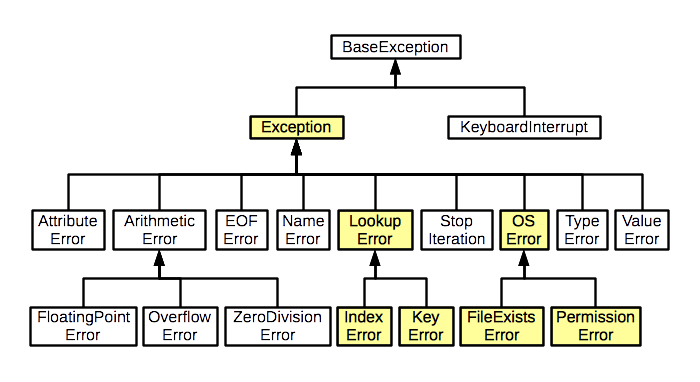

#### Словарь/иерархия исключений:

- BaseException - базовое исключение, от которого берут начало все остальные.
	- SystemExit - исключение, порождаемое функцией sys.exit при выходе из программы.
	- KeyboardInterrupt - порождается при прерывании программы пользователем (обычно сочетанием клавиш Ctrl+C).
	- GeneratorExit - порождается при вызове метода close объекта generator.
	- Exception - а вот тут уже заканчиваются полностью системные исключения (которые лучше не трогать) и начинаются обыкновенные, с которыми можно работать.
		- StopIteration - порождается встроенной функцией next, если в итераторе больше нет элементов.
		- ArithmeticError - арифметическая ошибка.
			- FloatingPointError - порождается при неудачном выполнении операции с плавающей запятой. На практике встречается нечасто.
			- OverflowError - возникает, когда результат арифметической операции слишком велик для представления. Не появляется при обычной работе с целыми числами (так как python поддерживает длинные числа), но может возникать в некоторых других случаях.
			- ZeroDivisionError - деление на ноль.
		- AssertionError - выражение в функции assert ложно.
		- AttributeError - объект не имеет данного атрибута (значения или метода).
		- BufferError - операция, связанная с буфером, не может быть выполнена.
		- EOFError - функция наткнулась на конец файла и не смогла прочитать то, что хотела.
		- ImportError - не удалось импортирование модуля или его атрибута.
		- LookupError - некорректный индекс или ключ.
			- IndexError - индекс не входит в диапазон элементов.
			- KeyError - несуществующий ключ (в словаре, множестве или другом объекте).
		- MemoryError - недостаточно памяти.
		- NameError - не найдено переменной с таким именем.
			- UnboundLocalError - сделана ссылка на локальную переменную в функции, но переменная не определена ранее.
		- OSError - ошибка, связанная с системой.
			- BlockingIOError
			- ChildProcessError - неудача при операции с дочерним процессом.
			- ConnectionError - базовый класс для исключений, связанных с подключениями.
				- BrokenPipeError
				- ConnectionAbortedError
				- ConnectionRefusedError
				- ConnectionResetError
			- FileExistsError - попытка создания файла или директории, которая уже существует.
			- FileNotFoundError - файл или директория не существует.
			- InterruptedError - системный вызов прерван входящим сигналом.
			- IsADirectoryError - ожидался файл, но это директория.
			- NotADirectoryError - ожидалась директория, но это файл.
			- PermissionError - не хватает прав доступа.
			- ProcessLookupError - указанного процесса не существует.
			- TimeoutError - закончилось время ожидания.
		- ReferenceError - попытка доступа к атрибуту со слабой ссылкой.
		- RuntimeError - возникает, когда исключение не попадает ни под одну из других категорий.
		- NotImplementedError - возникает, когда абстрактные методы класса требуют переопределения в дочерних классах.
		- SyntaxError - синтаксическая ошибка.
			- IndentationError - неправильные отступы.
				- TabError - смешивание в отступах табуляции и пробелов.
		- SystemError - внутренняя ошибка.
		- TypeError - операция применена к объекту несоответствующего типа.
		- ValueError - функция получает аргумент правильного типа, но некорректного значения.
		- UnicodeError - ошибка, связанная с кодированием / раскодированием unicode в строках.
			- UnicodeEncodeError - исключение, связанное с кодированием unicode.
			- UnicodeDecodeError - исключение, связанное с декодированием unicode.
			- UnicodeTranslateError - исключение, связанное с переводом unicode.
		- Warning - предупреждение.
        
*// <a href="https://tatyderb.gitbooks.io/python-express-course/content/chapter_exception/3_tree.html">Источник</a>*


***
Есть ли какая-то ошибка в данном случае?

In [ ]:
try:
    код_программы
except ArithmeticError:
    код_исключения1
except ZeroDevision:
    код_исключения2
except Exception:
    код_исключения3

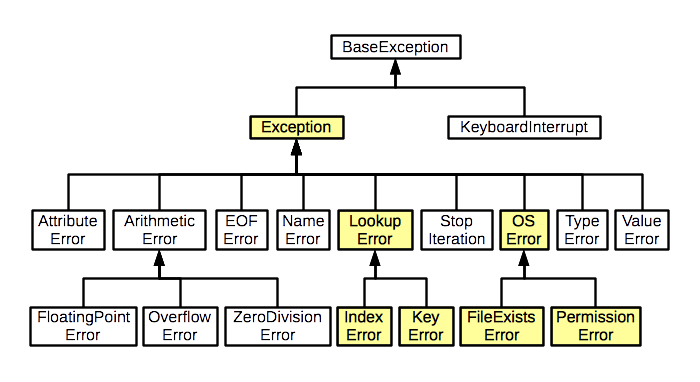

***
Засчёт использования парадигмы ООП достигается гибкость и расширяемость данного механизма. Каждый тип исключения представляет собой класс Python, наследующий от родительского типа исключения. Таким образом, можно говорить об их иерархической структуре. Помимо встроенных типов исключений, в языке Python есть возможность определять и генерировать собственные исключения:

In [11]:
class CustomError(Exception): # Класс CustomError наследует функционал его родительского класса, Exception
    pass

raise CustomError('Какое-то кастомное сообщение об ошибке')

CustomError: Какое-то кастомное сообщение об ошибке

Как и в случае встроенных типов исключений, определённые вами исключения можно точно так же перехватыввать и обрабатывать:

In [2]:
class CustomError(Exception): # Класс CustomError наследует функционал его родительского класса, Exception
    pass

try:
    raise CustomError('Какое-то кастомное сообщение об ошибке', 'Название ошибки')
except CustomError as exc:
    print(exc)
    print(exc.args)
    print('ERROR:', exc.args[1])
    print('ERROR:', exc.args[0])

('Какое-то кастомное сообщение об ошибке', 'Название ошибки')
('Какое-то кастомное сообщение об ошибке', 'Название ошибки')
ERROR: Название ошибки
ERROR: Какое-то кастомное сообщение об ошибке


Если исключение создается с несколькими аргументами, эти аргументы передаются
обработчику в форме кортежа, к которому можно обратиться через переменную
**args** объекта ошибки:

In [ ]:
class CustomError(Exception): # Класс CustomError наследует функционал его родительского класса, Exception
    pass

try:
    raise CustomError('Какое-то кастомное сообщение об ошибке')
except CustomError as exc:
    print('ERROR:', exc)
    

***
Если CustomError наследует от Exception, чем отличаются конструкции except Exception и except CustomError?

Есть ли ошибки в примере ниже?

In [ ]:
try:
    raise CustomError('Какое-то кастомное сообщение об ошибке')
except Exception as exc_1:
    print('Exception ERROR:', exc_1)
except CustomError as exc_2:
    print('CustomError ERROR:', exc_2)

### Менеджеры контекста и ключевое слово with

In [ ]:
try:
    infile = open(filename)
    data = infile.read()
finally:
    infile.close()

Однако, как вы уже знаете, существует более простой способ работы с файлом:

In [ ]:
with open(filename) as infile:
    data = infile.read()

Менеджеры контекста превосходно подходят для таких задач, как установление и снятие блокировки ресурсов, закрытие файлов, закрепление транзакций в базах данных и т. д.<br/>
Поскольку создание собственных менеджеров контекстов выходит за рамки данного курса, для знакомства с ними вы можете изучить документацию к встроенному модулю **contextlib**.

### Команда assert

Команда **assert** является специализированной формой команды **raise** и исользуется при обнаружении причины ошибки (отладке) программ:

In [ ]:
assert выражение, аргумент

Аргумент является необязательным и может использоваться для передачи описания.

In [8]:
x = (1, 2, 3)
assert len(x) > 5, "len(x) not > 5"

AssertionError: len(x) not > 5

In [11]:
def divide(x, y):
    assert y != 0 , 'Нельзя делить на 0'
    return round(x/y, 2)

result = divide(22,3)
print(result)

a = divide(15,0)
print(a)


7.33


AssertionError: Нельзя делить на 0

Если системная переменная \__debug__ равна True, то инициируется исключение AssertionError с необязательным аргументом.</br>
Для отключения переменной \__debug__ следует запустить интерпретатор Python с ключом -O или -OO или присвоить системной переменной PYTHONOPTIMIZE значение True.

### Написание тестов. Библиотека pytest
Необходимые библиотеки: pytest, ipytest

**Зачем писать тесты?**
- Тесты проверяют работоспособность кода
- Тесты проверяют исполнение контрактов поведения кода
- Тесты позволяют проверять взаимодействие старого и нового кода
- Тесты поощряют написание кода слабого зацепления
- Тесты могут выступать в роли документации к коду
- Тесты позволяют легче осознать, когда пора переходить к работе над другими задачами

Условно тесты можно поделить на **юнит тесты** и **интеграционные тесты**. 

Основная функция **юнит тестов** - проверка работоспособности отдельных компонентов программы (например, функции). В свою очередь, **интеграционные тесты** созданы для проверки функционирования комплекса модулей и/или всей системы.

Для написания тестов в стандартной библиотеке Python существует модуль **unittest**. Однако в рамках данной лекции мы будем рассматривать наисание тестов при помощи библиотеки **pytest**. При выполнении домашнего задания вы сможете получить общее представление о встроенном модуле **unittest**. 

#### Написание тестов при помощи библиотеки pytest

In [6]:
import pytest
import ipytest # библиотека для запуска тестов pytest в jupyter-ноутбуке

def power(x, y):
    return x ** y

def test_on_power():
    assert power(2, 8) == 256


ModuleNotFoundError: No module named 'pytest'

In [23]:
ipytest.run('-qq')

F                                                                                            [100%]
============================================= FAILURES =============================================
__________________________________________ test_on_power ___________________________________________

    def test_on_power():
>       assert power(2, 8) == 254
E       AssertionError

<ipython-input-20-7350afeafd18>:8: AssertionError
===================================== short test summary info ======================================
FAILED tmpx3lf0948.py::test_on_power - AssertionError


In [39]:
import pytest
import ipytest # библиотека для запуска тестов pytest в jupyter-ноутбуке

def division(x, y):
    return x / y

def test_on_zero_division():
    with pytest.raises(ZeroDivisionError): 
        division(1, 0)

In [40]:
ipytest.run('-qq')

F.                                                                                           [100%]
============================================= FAILURES =============================================
__________________________________________ test_on_power ___________________________________________

    def test_on_power():
>       assert power(2, 8) == 254
E       AssertionError

<ipython-input-20-7350afeafd18>:8: AssertionError
===================================== short test summary info ======================================
FAILED tmpzqhmgig7.py::test_on_power - AssertionError


Используя библиотеку pytest можно также создавать параметризованные тесты

In [41]:
def sym_size(line):
    return len(line)

@pytest.mark.parametrize(
    ('line', 'expected_size'), [
        ('AAAAAAAA', 8),
        ('Bb!@#$%^&*', 10),
        ('Bb!@# $%^&*', 10)
    ]
)
def test_on_sym_size(line, expected_size):
    assert sym_size(line) == expected_size
    

In [42]:
ipytest.run('-qq')

F...F                                                                                        [100%]
============================================= FAILURES =============================================
__________________________________________ test_on_power ___________________________________________

    def test_on_power():
>       assert power(2, 8) == 254
E       AssertionError

<ipython-input-20-7350afeafd18>:8: AssertionError
_________________________________ test_on_sym_size[Bb!@# $%^&*-10] _________________________________

line = 'Bb!@# $%^&*', expected_size = 10

    @pytest.mark.parametrize(
        ('line', 'expected_size'), [
            ('AAAAAAAA', 8),
            ('Bb!@#$%^&*', 10),
            ('Bb!@# $%^&*', 10)
        ]
    )
    def test_on_sym_size(line, expected_size):
>       assert sym_size(line) == expected_size
E       AssertionError

<ipython-input-41-f134011aeb3b>:12: AssertionError
===================================== short test summary info =============

### Домашнее задание
В рамках домашнего задания ознакомьтесь с докладом Марии Зеленовой. Её лекция поспособствует более полному формированию у вас представления о том, в чём состоит тестирование программ, какие бывают тесты, а также зачем и как и писать.<br/>
- Видео: https://www.youtube.com/watch?v=2-EBSIRs0H4
- Расшифровка: https://habr.com/ru/company/yandex/blog/517266/<br/>
\* некоторые материалы и примеры при подготовке лекции были взяты из этого доклада